In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data = pd.read_csv(r"D:\OASIS\Projects\UNEMPLOYMENT\Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [34]:
data.shape

(754, 7)

In [35]:
data.columns

Index(['Region', 'Date', 'Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [36]:
data.isnull().sum()

Region                                      14
Date                                        14
Frequency                                   14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64

In [37]:
# Remove rows with any empty or NaN values
data = data.dropna()

# Save the cleaned DataFrame to a new CSV file
data.to_csv("cleaned_data.csv", index=False)

print("Cleaned DataFrame saved to 'cleaned_data.csv'")


Cleaned DataFrame saved to 'cleaned_data.csv'


In [38]:
data.isnull().sum()

Region                                      0
Date                                        0
Frequency                                   0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [41]:
# Check for duplicates
print(data.duplicated().sum())

0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1   Date                                      740 non-null    object 
 2   Frequency                                 740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [40]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [42]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Add 'Day', 'Month', and 'Year' columns
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year

# Display the updated DataFrame with new columns
data.head()

C:\Users\sambi\AppData\Local\Temp\ipykernel_22144\2194291195.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\sambi\AppData\Local\Temp\ipykernel_22144\2194291195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\sambi\AppData\Local\Temp\ipykernel_22144\2194291195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


In [43]:
data.columns

Index(['Region', 'Date', 'Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Day', 'Month', 'Year'],
      dtype='object')

In [44]:
# Count the number of occurrences of each unique value in the 'Area' column
area_counts = data['Area'].value_counts()

print("Number of Occurrences of Each Unique Value in 'Area' column:")
print(area_counts)

Number of Occurrences of Each Unique Value in 'Area' column:
Area
Urban    381
Rural    359
Name: count, dtype: int64


In [45]:
# Count the number of unique regions
num_regions = data['Region'].nunique()

print("Number of Unique Regions:", num_regions)

Number of Unique Regions: 28


In [46]:
# Count the number of occurrences of each unique value in the 'Area' column
Region_counts = data['Region'].value_counts()

print("Number of Occurrences of Each Unique Value in 'Region' column:")
print(Region_counts)

Number of Occurrences of Each Unique Value in 'Region' column:
Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64


In [47]:
# Count the number of occurrences of each unique value in the 'Area' column
Frequency_counts = data['Frequency'].value_counts()

print("Number of Occurrences of Each Unique Value in 'Frequency' column:")
print(Frequency_counts)

Number of Occurrences of Each Unique Value in 'Frequency' column:
Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64


In [48]:
# Drop the 'Date' column
data = data.drop('Frequency', axis=1)

# Print the DataFrame after dropping the column
print("DataFrame after dropping 'Frequency' column:")
data.head()

DataFrame after dropping 'Frequency' column:


,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,30,September,2019


In [49]:
# Drop the 'Date' column
data = data.drop('Date', axis=1)

# Print the DataFrame after dropping the column
print("DataFrame after dropping 'Date' column:")
data.head()

DataFrame after dropping 'Date' column:


,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,30,September,2019


In [50]:
# Assuming you have performed data analyses and modified the DataFrame 'data'

# Save the edited DataFrame to a new CSV file
data.to_csv("edited_data.csv", index=False)

print("Edited DataFrame saved to 'edited_data.csv'")

Edited DataFrame saved to 'edited_data.csv'


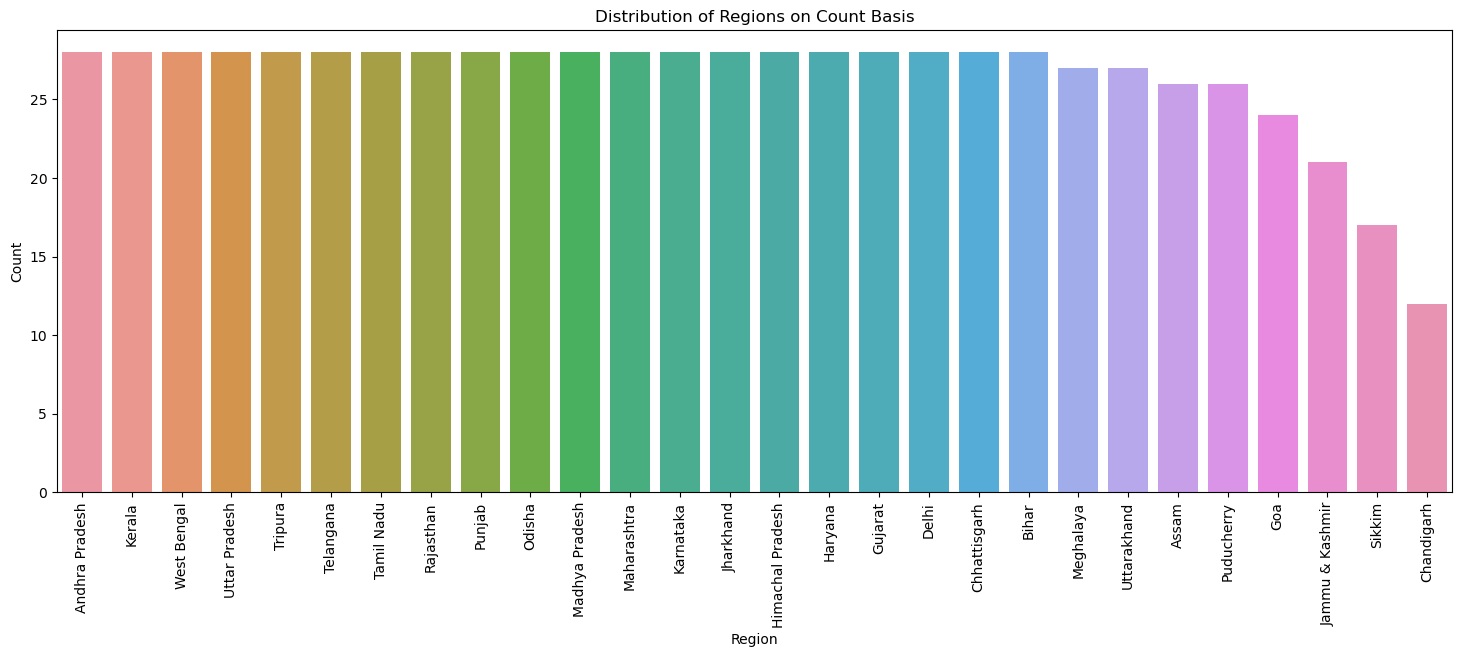

In [51]:
# Count the occurrences of each species
species_counts = data['Region'].value_counts()

# Plotting
plt.figure(figsize=(18, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Distribution of Regions on Count Basis')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [52]:
# Summary statistics for numerical columns
numerical_cols = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
summary_stats = data[numerical_cols].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max

In [57]:
# Group by 'Region' and calculate mean unemployment rate and employment numbers
region_stats = data.groupby('Region').agg({
    ' Estimated Unemployment Rate (%)': 'mean',
    ' Estimated Employed': 'sum'
})
print("\nAverage Unemployment Rate and Total Employed per Region:")
print(region_stats)


Average Unemployment Rate and Total Employed per Region:
                   Estimated Unemployment Rate (%)   Estimated Employed
Region                                                                 
Andhra Pradesh                            7.477143          228314609.0
Assam                                     6.428077          139224076.0
Bihar                                    18.918214          346253296.0
Chandigarh                               15.991667            3801975.0
Chhattisgarh                              9.240357          120497960.0
Delhi                                    16.495357           73570360.0
Goa                                       9.274167            5431400.0
Gujarat                                   6.663929          319256358.0
Haryana                                  26.283214           99598029.0
Himachal Pradesh                         18.540357           29675064.0
Jammu & Kashmir                          16.188571           37798565.0
Jharkh

In [53]:
# Average unemployment rate by region
avg_unemployment_by_region = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

print("\nAverage Unemployment Rate by Region:")
print(avg_unemployment_by_region)



Average Unemployment Rate by Region:
Region
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir     16.188571
Delhi               16.495357
Himachal Pradesh    18.540357
Bihar               18.918214
Jharkhand           20.585000
Haryana             26.283214
Tripura             28.350357
Name:  Estimated Unemployment Rate (%), dtype: float64


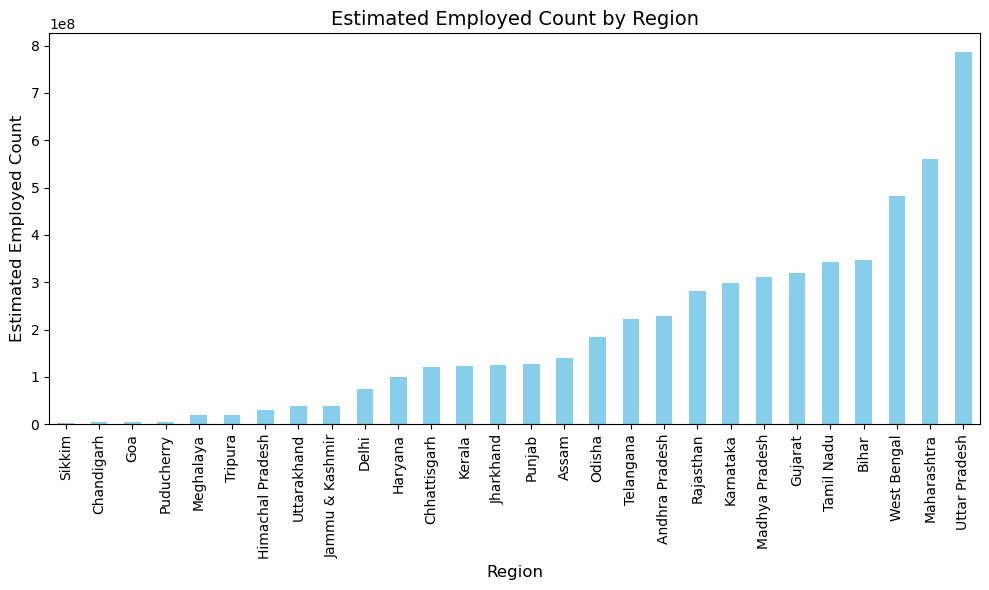

In [54]:
import matplotlib.pyplot as plt

# Bar plot for estimated employed count by region
plt.figure(figsize=(10, 6))
data.groupby('Region')[' Estimated Employed'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Employed Count', fontsize=12)
plt.title('Estimated Employed Count by Region', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

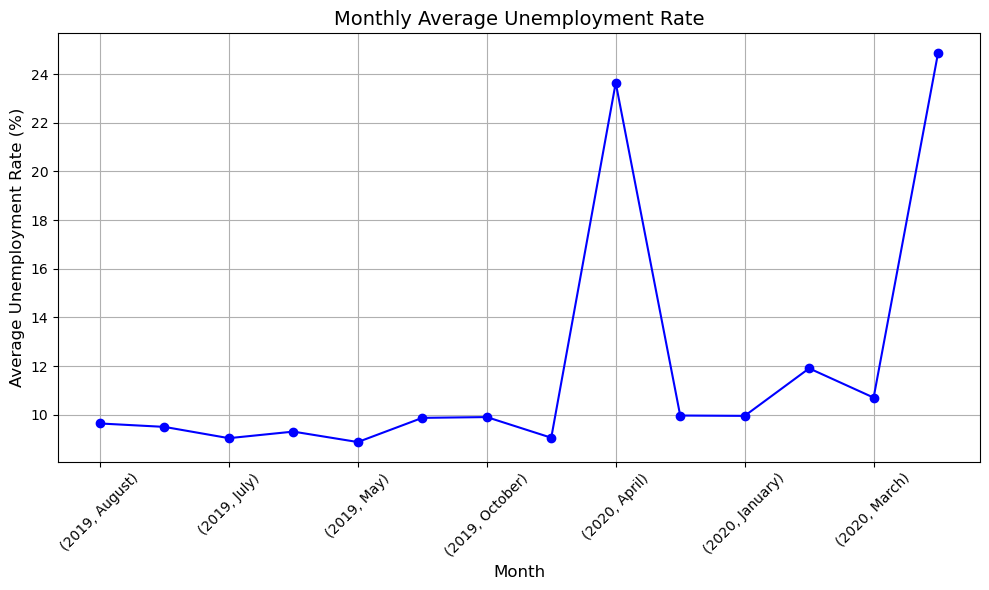

In [68]:
# Line plot for monthly average unemployment rate
monthly_avg_unemployment = data.groupby(['Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean()
monthly_avg_unemployment.plot(kind='line', figsize=(10, 6), marker='o', color='b')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Monthly Average Unemployment Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

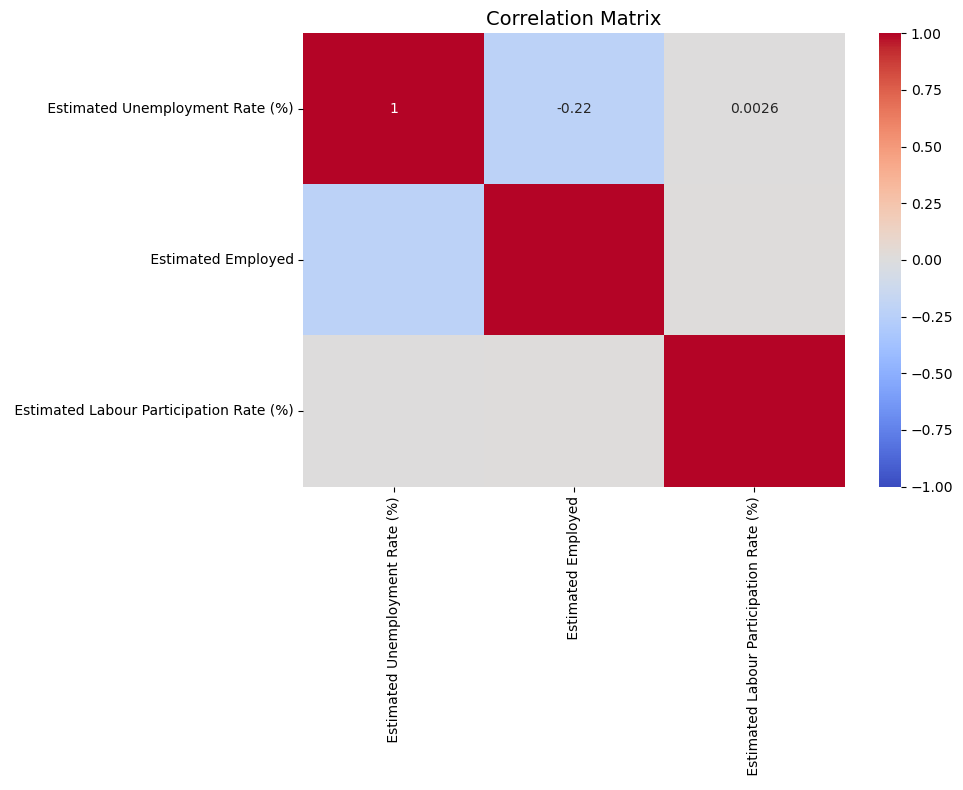

In [56]:
# Correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\sambi\AppData\Local\Temp\ipykernel_22144\719320313.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=avg_unemployment_by_region, x='Month', y=' Estimated Unemployment Rate (%)', hue='Region', palette='Set1', ci=None)
C:\Users\sambi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sambi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


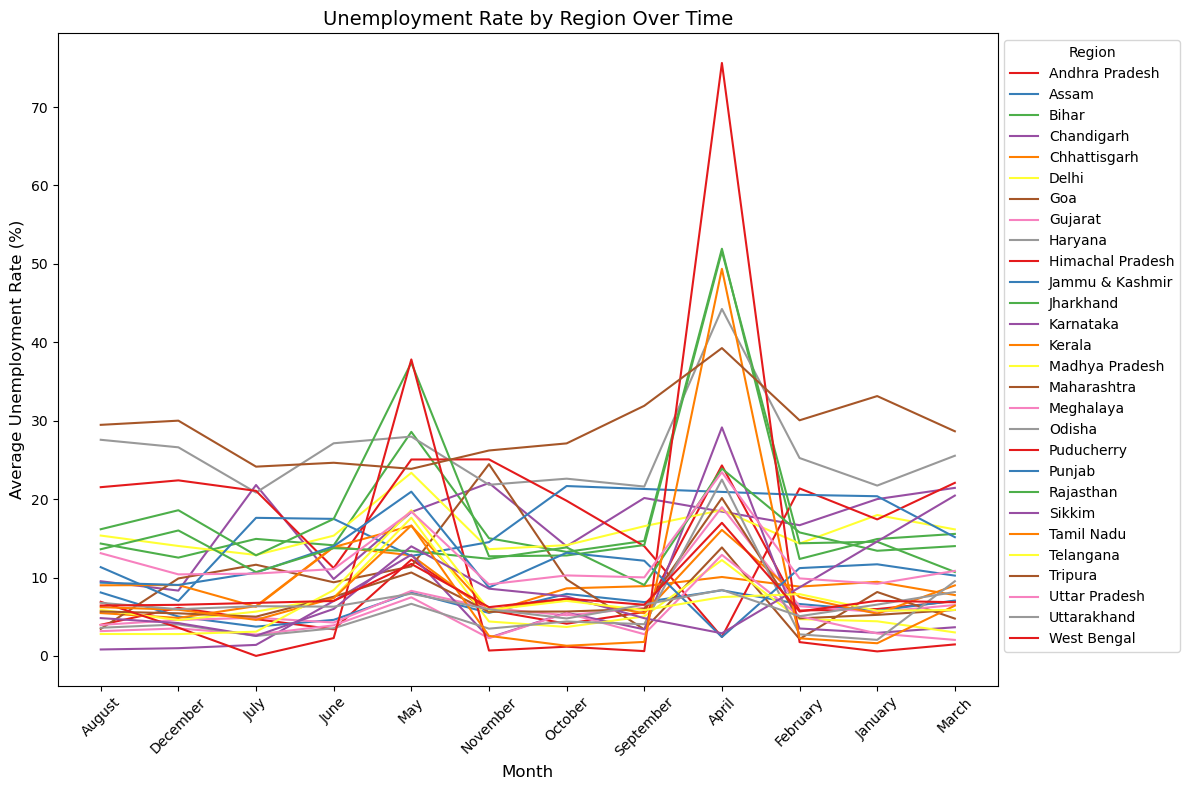

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for unemployment rate in all regions
plt.figure(figsize=(12, 8))

# Group by 'Year', 'Month', and 'Region' and calculate the mean unemployment rate for each region
avg_unemployment_by_region = data.groupby(['Year', 'Month', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot each region's unemployment rate
sns.lineplot(data=avg_unemployment_by_region, x='Month', y=' Estimated Unemployment Rate (%)', hue='Region', palette='Set1', ci=None)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate by Region Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\sambi\AppData\Local\Temp\ipykernel_22144\3036166381.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=avg_unemployment_by_region, x='Month', y=' Estimated Employed', hue='Region', palette='Set1', ci=None)
C:\Users\sambi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sambi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


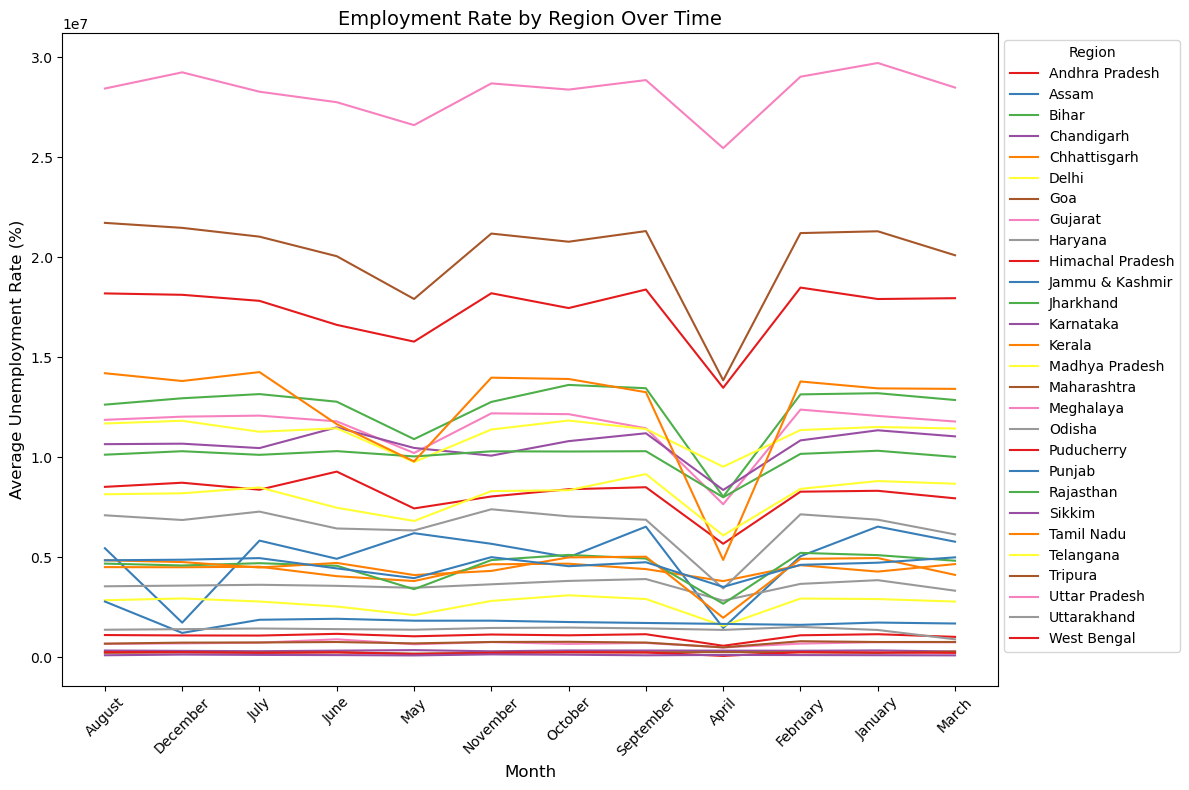

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for unemployment rate in all regions
plt.figure(figsize=(12, 8))

# Group by 'Year', 'Month', and 'Region' and calculate the mean unemployment rate for each region
avg_unemployment_by_region = data.groupby(['Year', 'Month', 'Region'])[' Estimated Employed'].mean().reset_index()

# Plot each region's unemployment rate
sns.lineplot(data=avg_unemployment_by_region, x='Month', y=' Estimated Employed', hue='Region', palette='Set1', ci=None)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Employment Rate by Region Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [58]:
# Filter regions with unemployment rate above a threshold
high_unemployment_regions = data[data[' Estimated Unemployment Rate (%)'] > 11.0]
print("\nRegions with Unemployment Rate > 11%:")
print(high_unemployment_regions[['Region', ' Estimated Unemployment Rate (%)']])


Regions with Unemployment Rate > 11%:
             Region   Estimated Unemployment Rate (%)
11   Andhra Pradesh                             16.29
12   Andhra Pradesh                             14.46
28            Bihar                             13.44
31            Bihar                             12.47
32            Bihar                             12.40
..              ...                               ...
725   Uttar Pradesh                             13.05
737     Uttarakhand                             13.18
738     Uttarakhand                             17.36
751     West Bengal                             15.63
752     West Bengal                             15.22

[291 rows x 2 columns]


In [59]:
# Time series analysis, e.g., average unemployment rate per month
monthly_average = data.groupby(['Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean()
print("\nMonthly Average Unemployment Rate:")
print(monthly_average)


Monthly Average Unemployment Rate:
Year  Month    
2019  August        9.637925
      December      9.497358
      July          9.033889
      June          9.303333
      May           8.874259
      November      9.868364
      October       9.900909
      September     9.051731
2020  April        23.641569
      February      9.964717
      January       9.950755
      June         11.903600
      March        10.700577
      May          24.875294
Name:  Estimated Unemployment Rate (%), dtype: float64


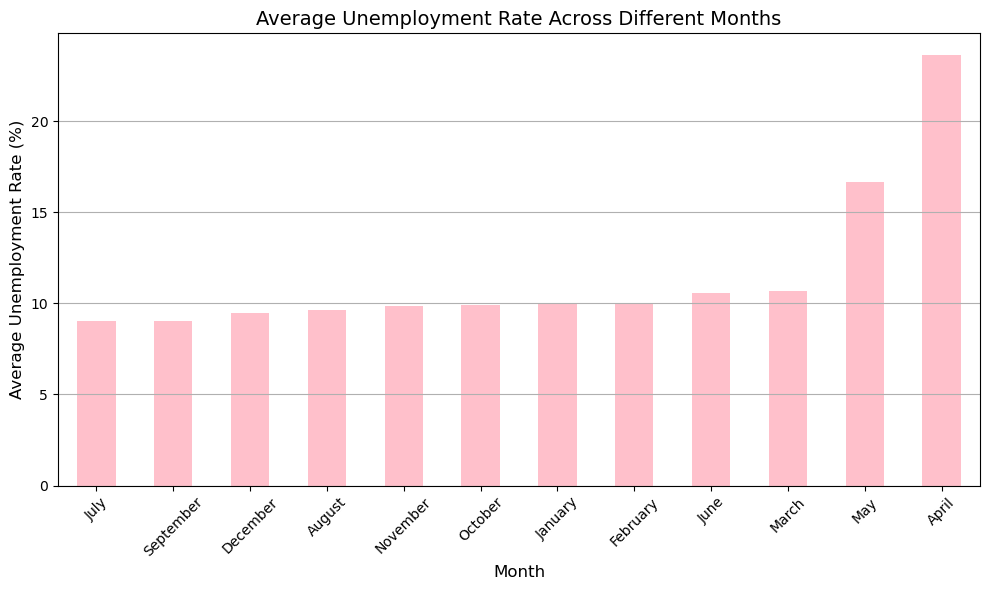

In [77]:
# Group by 'Month' and calculate the mean unemployment rate
monthly_average_unemployment = data.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

# Bar plot for average unemployment rate across different months
plt.figure(figsize=(10, 6))
monthly_average_unemployment.plot(kind='bar', color='Pink')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Average Unemployment Rate Across Different Months', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

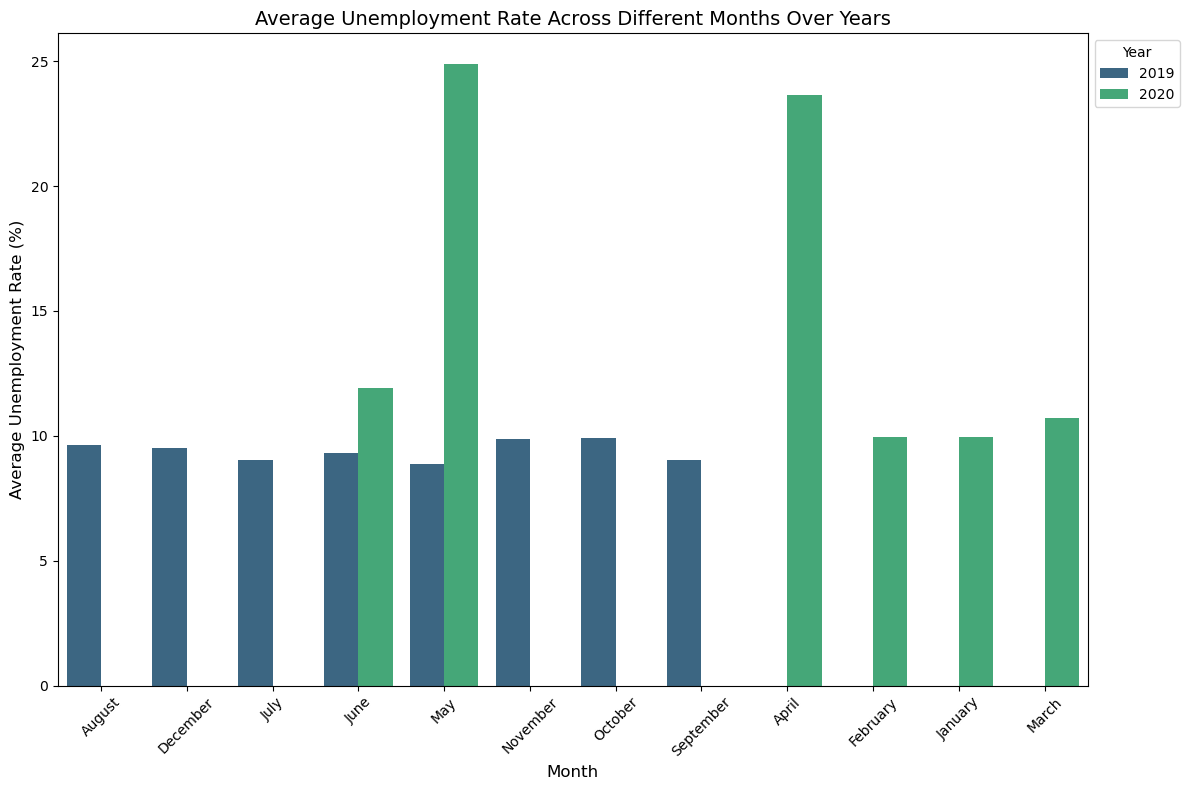

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' to string
yearly_monthly_average_unemployment['Year'] = yearly_monthly_average_unemployment['Year'].astype(str)

# Sort the data by year and month
yearly_monthly_average_unemployment = yearly_monthly_average_unemployment.sort_values(by=['Year', 'Month'])

# Bar plot for average unemployment rate across different months over years
plt.figure(figsize=(12, 8))
sns.barplot(data=yearly_monthly_average_unemployment, x='Month', y=' Estimated Unemployment Rate (%)', hue='Year', palette='viridis')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Average Unemployment Rate Across Different Months Over Years', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


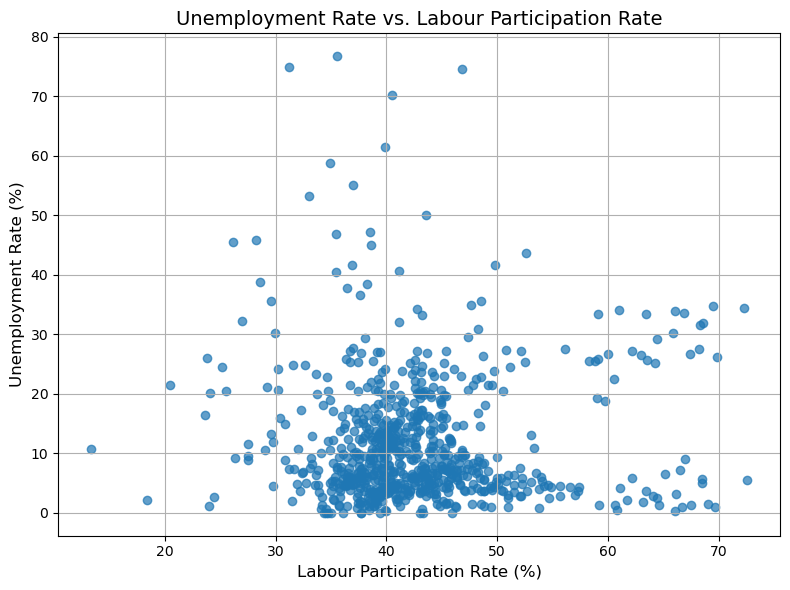

In [71]:
# Scatter plot for unemployment rate vs. labour participation rate
plt.figure(figsize=(8, 6))
plt.scatter(data[' Estimated Labour Participation Rate (%)'], data[' Estimated Unemployment Rate (%)'], alpha=0.7)
plt.xlabel('Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate vs. Labour Participation Rate', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

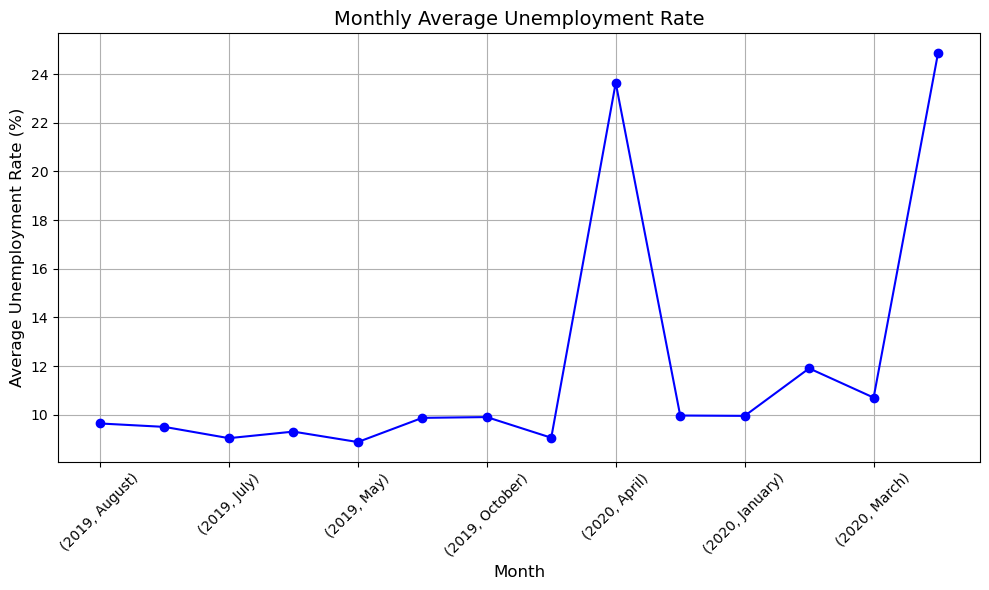

In [62]:
# Line plot for average unemployment rate per month
monthly_average.plot(kind='line', figsize=(10, 6), marker='o', color='b')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Monthly Average Unemployment Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()